In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Environment parameters
gamma = 0.9
noise = 0.2
living_reward = 0

# Grid dimensions
rows, cols = 3, 4

# Define the rewards grid
# None = wall, other values = rewards
rewards = np.zeros((rows, cols))
rewards[0, 3] = +1  # Terminal state with +1
rewards[1, 3] = -1  # Terminal state with -1
rewards[1, 1] = None  # Wall

# Terminal and wall states
terminal_states = [(0, 3), (1, 3)]
wall_states = [(1, 1)]

rewards, terminal_states, wall_states

(array([[ 0.,  0.,  0.,  1.],
        [ 0., nan,  0., -1.],
        [ 0.,  0.,  0.,  0.]]),
 [(0, 3), (1, 3)],
 [(1, 1)])

# Display the maze

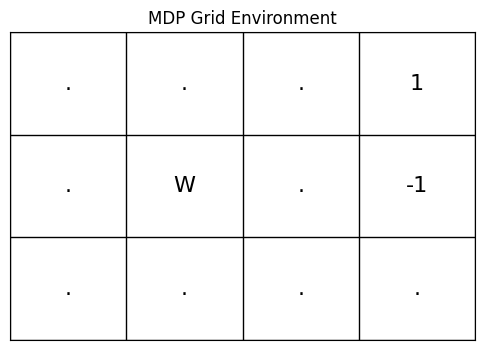

In [18]:
# Prepare a display matrix for visualization
display_matrix = np.full((rows, cols), '', dtype=object)

# Fill in the display matrix
for r in range(rows):
    for c in range(cols):
        if (r, c) in terminal_states:
            display_matrix[r, c] = f"{rewards[r, c]:.0f}"
        elif (r, c) in wall_states:
            display_matrix[r, c] = "W"
        else:
            display_matrix[r, c] = "."

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xticks(np.arange(cols + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(rows + 1) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

# Display each cell's label
for r in range(rows):
    for c in range(cols):
        text = display_matrix[r, c]
        ax.text(c, r, text, va='center', ha='center', fontsize=16)

# Set axis limits and hide major ticks
ax.set_xlim(-0.5, cols - 0.5)
ax.set_ylim(rows - 0.5, -0.5)
ax.set_xticks([])
ax.set_yticks([])

plt.title("MDP Grid Environment")
plt.show()

In [19]:
# Actions and their directions
actions = ['U', 'D', 'L', 'R']
action_vectors = {
    'U': (-1, 0),
    'D': (1, 0),
    'L': (0, -1),
    'R': (0, 1)
}

# Initialize value function
V = np.zeros((rows, cols))
policy = np.full((rows, cols), '', dtype=object)

V

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [23]:


# Utility function to check bounds
def in_bounds(state):
    r, c = state
    return 0 <= r < rows and 0 <= c < cols and (r, c) not in wall_states

# Perform one-step lookahead for all actions from a state
def compute_action_value(state, action, V):
    r, c = state
    primary_move = action_vectors[action]

    # Define possible noisy outcomes
    if action in ['U', 'D']:
        sideways = ['L', 'R']
    else:
        sideways = ['U', 'D']
    
    moves = [(primary_move, 1 - noise)] + [(action_vectors[a], noise / 2) for a in sideways]

    value = 0
    for move, prob in moves:
        new_r, new_c = r + move[0], c + move[1]
        if not in_bounds((new_r, new_c)):
            new_r, new_c = r, c  # Bounce back
        reward = living_reward if (new_r, new_c) not in terminal_states else rewards[new_r, new_c]
        value += prob * (reward + gamma * V[new_r, new_c])
    return value

# Value iteration loop
theta = 1e-4
iteration = 0
while True:
    delta = 0
    new_V = np.copy(V)
    for r in range(rows):
        for c in range(cols):
            if (r, c) in terminal_states or (r, c) in wall_states:
                continue
            values = [compute_action_value((r, c), a, V) for a in actions]
            best_value = max(values)
            new_V[r, c] = best_value
            delta = max(delta, abs(best_value - V[r, c]))
    V = new_V
    iteration += 1
    if delta < theta:
        break

# Derive policy
for r in range(rows):
    for c in range(cols):
        if (r, c) in terminal_states:
            policy[r, c] = 'T'
        elif (r, c) in wall_states:
            policy[r, c] = 'W'
        else:
            values = [compute_action_value((r, c), a, V) for a in actions]
            best_action = actions[np.argmax(values)]
            policy[r, c] = best_action



In [22]:
import pandas as pd

# Display the value function
pd.DataFrame(V)

# Display the policy
pd.DataFrame(policy)

,0,1,2,3
0,R,R,R,T
1,U,W,U,T
2,U,L,U,L
